# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [43]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes, one for each branch
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

# Generating a quick sample of the south branch dataframe:
south_df.sample(7)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
194,194,South,Sales Support,1:00 PM,Outgoing,D,George,NO,0,0,10,1,NaN,3,1
38,38,South,Complaint,12:00 PM,Incoming,D,Kate,NO,0,0,10,1,2.0,2,1
106,106,South,Complaint,4:00 PM,Incoming,D,George,NO,0,0,12,3,4.0,3,1
53,53,South,Sales Support,11:00 AM,Incoming,C,Eric,NO,0,0,9,2,3.0,4,1
34,34,South,Product Support,3:00 PM,Incoming,D,Randy,NO,0,0,9,3,2.0,3,1
217,217,South,Product Support,11:00 AM,Outgoing,C,Sharon,NO,0,0,9,1,NaN,4,1
207,207,South,Product Support,10:00 AM,Outgoing,D,George,NO,0,0,8,2,NaN,4,1


In [44]:
# Generating a quick sample of the north branch dataframe:
north_df.sample(7)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
113,113,North,Sales Support,12:00 PM,Outgoing,B,Brent,NO,0,0,9,1,NaN,2,1
88,88,North,Product Support,9:00 AM,Outgoing,A,Andy,NO,0,1,12,2,NaN,2,1
103,103,North,Sales Support,10:00 AM,Outgoing,B,Brent,NO,0,0,10,3,NaN,4,1
84,84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
100,100,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,10,2,NaN,2,1
25,25,North,Product Support,1:00 PM,Incoming,A,Amanda,NO,0,0,8,2,2.0,3,1
238,238,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,1,NaN,3,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [45]:
# EDA Question 1A solution below:

# Look at how many calls each rep handled. 
north_df['Rep ID'].value_counts()

# Now, determine how many unique reps work in the north branch
north_reps = north_df['Rep ID'].unique() # returns only unique rep values
print(f"There are {len(north_reps)} reps in the north branch")

There are 9 reps in the north branch


#### EDA Question 1B:  How many reps are in the South branch?  

In [46]:
# EDA Question 1B solution Below:

# Look at how many calls each rep handled. 
south_df['Rep ID'].value_counts()

# Now, determine how many unique reps work in the south branch
south_reps = south_df['Rep ID'].unique() # returns only unique rep values
print(f"There are {len(south_reps)} reps in the south branch")

There are 11 reps in the south branch


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [47]:
# EDA Question 2A solution Below:

avg_busy_mins = north_df['Busy Minutes'].mean()
avg_NR_mins = north_df['Not Ready Minutes'].mean()
avg_inc_wait_mins = north_df['Incoming Wait Time'].mean()
avg_dur_call_mins = north_df['During Call Wait Time'].mean()
print(f'''The average call wait times for the North branch are as follows:
      Busy Minutes: {round(avg_busy_mins, 1)} mins
      Not Ready Minutes: {round(avg_NR_mins, 1)} mins
      Incoming Wait Time: {round(avg_inc_wait_mins, 1)} mins
      During Call Wait Time: {round(avg_dur_call_mins, 1)} mins ''')

The average call wait times for the North branch are as follows:
      Busy Minutes: 10.0 mins
      Not Ready Minutes: 1.9 mins
      Incoming Wait Time: 3.0 mins
      During Call Wait Time: 3.0 mins 


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [48]:
# EDA Question 2B solution Below:

avg_busy_mins_S = south_df['Busy Minutes'].mean()
avg_NR_mins_S = south_df['Not Ready Minutes'].mean()
avg_inc_wait_mins_S = south_df['Incoming Wait Time'].mean()
avg_dur_call_mins_S = south_df['During Call Wait Time'].mean()
print(f'''The average call wait times for the South branch are as follows:
      Busy Minutes: {round(avg_busy_mins_S, 1)} mins
      Not Ready Minutes: {round(avg_NR_mins_S, 1)} mins
      Incoming Wait Time: {round(avg_inc_wait_mins_S, 1)} mins
      During Call Wait Time: {round(avg_dur_call_mins_S, 1)} mins ''')

The average call wait times for the South branch are as follows:
      Busy Minutes: 10.1 mins
      Not Ready Minutes: 1.9 mins
      Incoming Wait Time: 3.0 mins
      During Call Wait Time: 3.1 mins 


The numbers for each branch are quite similar. This is because the potential values for each column are banded. The Busy Minutes column is banded between 8-12 minutes, the Not Ready Minutes column is banded between 1-3 minutes, the Incoming Wait Time column is banded between 1-5 seconds, and the During Call Wait Time column is banded between 2-4 minutes. This is probably not realistic for real-world data, but since it is the form of the data we are working with here, it means it's not unusual for the average values between the two values to be very close to one another.

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [49]:
# EDA Question 3 solution Below:

# Time blocks are 9:00 AM, 10:00 AM, 11:00 AM, 12:00 PM, 1:00 PM, 2:00 PM, 3:00 PM, 4:00 PM, so there will be eight total values here (8 blocks, combine the two branches).

call_blocks = ['9:00 AM', '10:00 AM', '11:00 AM', '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM','4:00 PM']
for i in call_blocks:
    time_block_calls = len(north_df[north_df['Time Block'] == i]) + len(south_df[south_df['Time Block'] == i])
    print(f'The number of calls taken during the {i} block: {time_block_calls}')

The number of calls taken during the 9:00 AM block: 10
The number of calls taken during the 10:00 AM block: 99
The number of calls taken during the 11:00 AM block: 56
The number of calls taken during the 12:00 PM block: 120
The number of calls taken during the 1:00 PM block: 40
The number of calls taken during the 2:00 PM block: 65
The number of calls taken during the 3:00 PM block: 73
The number of calls taken during the 4:00 PM block: 53


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.0
> - Not Ready Minutes = 1.9
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.0
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.1
> - Not Ready Minutes = 1.9
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.1
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 0



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [50]:
# Question 1 solution below

# Locate missing values in each column of the North branch dataframe:
north_df.isna()
# isna() returns a dataframe of boolean values, where True outputs represent null values in the dataframe.

north_df.isna().sum()
# This is the cleanest (pun intended) way to find the missing data. 
# Incoming Wait Time has 163 missing data points due to outgoing calls.


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [51]:
# Locate missing values in each column of the South branch dataframe:
south_df.isna()
# isna() returns a dataframe of boolean values, where False outputs represent null values in the dataframe.


south_df.isna().sum()
## Incoming Wait Time has 188 missing data points due to outgoing calls.


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: The only missing data in both dataframes appears in the Incoming Wait Time column. This is a result of some of calls being outgoing calls, which do not have a corresponding wait time. Because these missing values correctly represent lack of wait time during outgoing calls, I will leave them in the dataset as-is. Replacing them with a 0 would create other issues and skew future calculations.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [52]:
# Cleaning Question 2 solution below:
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: Running the unique() method above showed that some of the 'YES' values are actually 'YES ' values, with a trailing space to the right of the word. The appropriate method to clean this is the strip method, specifically rstrip(), which removes all whitespace to the right of the text. Without cleaning this error, we would have inaccurate counts or groupings because 'Yes ' is treated differently from 'Yes'. The cleaning is performed in the below cell block, and unique() is then used to confirm we now have only two unique values ('YES' and 'NO').

In [53]:
north_df['Sale'] = north_df['Sale'].str.rstrip()
north_df['Sale'].unique()
# 'Yes ' value succesfully cleaned. Only two values ('YES', 'NO') remain.

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [54]:
# Cleaning Question 3 solution below:
# Count duplicate rows in the North branch dataframe
north_df.duplicated().sum()

np.int64(0)

In [55]:
# Count duplicate rows in the South branch dataframe
south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: There are no duplicates in either the north call center dataframe or the south call center dataframe, as shown in the above two code blocks where .duplicated.sum() returned 0 in both cases. If any duplicates had been found, they could have been removed using .drop_duplicates().

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [56]:
# Cleaning Question 4 solution below:

# Remove the redundant column 'Unnamed: 0' from both branch dataframes:
north_df = north_df.drop('Unnamed: 0', axis=1)
south_df = south_df.drop('Unnamed: 0', axis=1)

##### Record your answer below:
> Your Answer: The column named 'Unnamed: 0' is unnecessary. It is a leftover index column from the .csv. Pandas automatically creates its own index when reading a  CSV, so this column is redundant.  this column is not needed. I have removed this column from both dataframes using the .drop() method, and the samples run below confirm the column has been removed.

In [57]:
# Confirm removal of Unnammed: 0 column from the North branch dataframe
north_df.sample()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
74,North,Product Support,2:00 PM,Incoming,B,Todd,NO,0,0,9,1,5.0,4,1


In [58]:
# Confirm removal of Unnammed: 0 column from the South branch dataframe
south_df.sample()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
299,South,Product Support,4:00 PM,Outgoing,C,Eric,NO,0,0,9,2,NaN,4,1


## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [59]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df])
df.sample(5)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
222,South,Product Support,12:00 PM,Outgoing,D,Kate,NO,0,0,9,3,NaN,2,1
62,North,Complaint,10:00 AM,Incoming,B,Lilly,NO,0,0,12,2,4.0,4,1
201,North,Product Support,2:00 PM,Outgoing,A,Joe,NO,0,0,10,3,NaN,3,1
197,North,Product Support,2:00 PM,Outgoing,B,Duke,NO,0,0,12,1,NaN,3,1
257,South,Product Support,2:00 PM,Outgoing,C,Susan,NO,0,0,12,1,NaN,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [60]:
# Manipulation Question solution below:
# Group by Rep ID and Branch, then sum and sort by Calls in descending order.
calls_by_rep = df.groupby(['Rep ID', 'Branch'])['Calls'].sum().sort_values(ascending=False)
calls_by_rep

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
Lilly   North     30
George  South     29
Kate    South     29
Todd    North     29
Duke    North     29
Karl    South     28
Joe     North     26
Susan   South     26
Josh    South     26
Sharon  South     25
Cam     North     24
Xander  North     24
Amanda  North     23
Andy    North     23
Alice   South     20
Name: Calls, dtype: int64

##### Record your answer below
Rep with the highest number of calls and their total calls:
- North Branch = The representative at the North Branch with the highest number of calls is Brent with 37 calls.
- South Branch = The representative at the South Branch with the highest number of calls is Eric with 35 calls.

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [61]:
# Manipulation Question 2 solution below:
# Abandonment rate will be abandoned calls divided by total calls. 
# Group by north branch, then sum total number of calls and total number of abandoned, and divide them. 
# Then, do the same process grouping by south branch, and not grouping at all (whole company).

north_calls = df[df['Branch'] == 'North']['Calls'].sum()
north_abandoned_calls = df[df['Branch'] == 'North']['Abandoned'].sum()
north_calls  # South branch calls = 245
north_abandoned_calls # North branch abandoned calls = 7

north_abandonment_rate = (north_abandoned_calls / north_calls) * 100
print(f'The North Branch abandonment rate is {round(north_abandonment_rate, 2)}%')



The North Branch abandonment rate is 2.86%


In [62]:
# Solution for South Branch

south_calls = df[df['Branch'] == 'South']['Calls'].sum()
south_abandoned_calls = df[df['Branch'] == 'South']['Abandoned'].sum()
south_calls  # South branch calls = 314
south_abandoned_calls # South branch abandoned calls = 4

south_abandonment_rate = (south_abandoned_calls / south_calls) * 100
print(f'The South Branch abandonment rate is {round(south_abandonment_rate, 2)}%')

The South Branch abandonment rate is 1.27%


In [63]:
# Solution for Total Company
total_calls = df['Calls'].sum()
total_abandoned_calls = df['Abandoned'].sum()
total_calls  # Company-wide branch calls = 559
total_abandoned_calls # Company-wide abandoned calls = 11

total_abandonment_rate = (total_abandoned_calls / total_calls) * 100
print(f'The company-wide abandonment rate is {round(total_abandonment_rate, 2)}%')

The company-wide abandonment rate is 1.97%


The cleaner and more efficient approach to calculating the above results is to use a loop or a function. I have left the above code blocks to show the process involved in finding my final answer. In question 3 and 4 below, I have not included the intial code blocks used, and have left only the final loop or function for efficiency's sake.

In [64]:
# Solutions for all three abandonment rates in one function

def abandonment_rate_calc(df_branch):
    total_calls = df_branch['Calls'].sum()
    abandoned_calls = df_branch['Abandoned'].sum()
    abandonment_rate = (abandoned_calls / total_calls) * 100
    return total_calls, abandoned_calls, abandonment_rate

# Calculating results and generating an output for the North branch
north_df = df[df['Branch'] == 'North']
north_calls, north_abandoned_calls, north_abandonment_rate = abandonment_rate_calc(north_df)
print(f"The North Branch abandonment rate is {round(north_abandonment_rate, 2)}%")


# Calculating results and generating an output for the South branch
south_df = df[df['Branch'] == 'South']
south_calls, south_abandoned_calls, south_abandonment_rate = abandonment_rate_calc(south_df)
print(f"The South Branch abandonment rate is {round(south_abandonment_rate, 2)}%")


# Calculating results and generating an output for the entire company
total_calls, total_abandoned_calls, total_abandonment_rate = abandonment_rate_calc(df)
print(f"The company-wide abandonment rate is {round(total_abandonment_rate, 2)}%")

The North Branch abandonment rate is 2.86%
The South Branch abandonment rate is 1.27%
The company-wide abandonment rate is 1.97%


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide =1.97%
- Do any of these fall out of the optimal range of 2-5%? The South branch and overall company-wide abandonment rates are actually better than the optimal range. Impressive. The North branch average call abandonment rate is still well within the optimal range at 2.86%.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [65]:
# Manipulation Question 3 solution below:
df['Incoming Wait Time'].unique()
# The above line shows there are six unique values for wait time. 1, 2, 3, 4, 5 seconds, and NaN (for outgoing calls).
# Service Level = calls with wait times of 1s or 2s, divided by total incoming calls. I will exlude NaN since those rows are not incoming calls.

# Solution for Total Company

def service_level_calc(df):
    incoming_calls = df[df['Incoming Wait Time'] <= 5]['Calls'].sum() # Company-wide incoming calls answered = 208
    calls_2s_or_less = df[df['Incoming Wait Time'] <= 2]['Calls'].sum() # Company-wide calls answered in 2 seconds or less = 81
    service_level = (calls_2s_or_less / incoming_calls) * 100
    return incoming_calls, calls_2s_or_less, service_level

# Calculating results and generating an output for the entire company
total_inc_calls, total_2s_or_less, total_service_level = service_level_calc(df)
print(f'The company-wide service level is {round(total_service_level, 2)}%')

# Calculating results and generating an output for the North branch
north_df = df[df['Branch'] == 'North']
north_inc_calls, north_2s_or_less, north_service_level = service_level_calc(north_df)
print(f'The North branch service level is {round(north_service_level, 2)}%')

# Calculating results and generating an output for the South branch
south_df = df[df['Branch'] == 'South']
south_inc_calls, south_2s_or_less, south_service_level = service_level_calc(south_df)
print(f'The South branch service level is {round(south_service_level, 2)}%')


The company-wide service level is 38.94%
The North branch service level is 40.24%
The South branch service level is 38.1%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = The North Branch answered a total of 82 calls, and answered 33 of the incoming calls in two seconds or less, giving a service level of 40.24%.
- South Branch = The South Branch answered a total of 126 calls, and answered 48 of the incoming calls in two seconds or less, giving a service level of 38.1%.
- Company Wide = The overall company answered a total of 208 calls, and answered 81 of the incoming calls in two seconds or less, giving a service level of 38.94%.

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [66]:
# Manipulation Question 4 solution below:
# This will need to be answered using a weighted average. It will be number of calls answered in 1s * 1, + number of calls answered in 2s * 2 + number of calls answered in 3s * 3 +
# number of calls answered in 4s * 4 + number of calls answered in 5s * 5. 

# Creating a general function for y

def avg_speed_calc(df_branch):
    total_1s = df_branch[df_branch['Incoming Wait Time'] == 1]['Calls'].sum() # Number of calls answered in 1 second
    total_2s = df_branch[df_branch['Incoming Wait Time'] == 2]['Calls'].sum() # Number of calls answered in 2 seconds
    total_3s = df_branch[df_branch['Incoming Wait Time'] == 3]['Calls'].sum() # Number of calls answered in 3 seconds
    total_4s = df_branch[df_branch['Incoming Wait Time'] == 4]['Calls'].sum() # Number of calls answered in 4 seconds
    total_5s = df_branch[df_branch['Incoming Wait Time'] == 5]['Calls'].sum() # Number of calls answered in 5 seconds
    total_incoming_calls = df_branch[df_branch['Incoming Wait Time'] <= 5]['Calls'].sum() # Total incoming calls, not including NaN values (outgoing calls)
    avg_speed = ((total_1s*1) + (total_2s*2) + (total_3s*3) + (total_4s*4) + (total_5s*5)) / total_incoming_calls # Calculated weighted average speed of answer
    return avg_speed, total_1s, total_2s, total_3s, total_4s, total_5s, total_incoming_calls


# Calculating results and generating an output for the entire company
avg_speed_of_answer, total_1s, total_2s, total_3s, total_4s, total_5s, total_incoming_calls = avg_speed_calc(df)
print(f"The company-wide average speed of answer is {round(avg_speed_of_answer, 2)} seconds")

# Calculating results and generating an output for the North branch
north_df = df[df['Branch'] == 'North']
north_avg_speed_of_answer, north_1s, north_2s, north_3s, north_4s, north_5s, north_incoming_calls = avg_speed_calc(north_df)
print(f"The North branch average speed of answer is {round(north_avg_speed_of_answer, 2)} seconds")


# Calculating results and generating an output for the South branch
south_df = df[df['Branch'] == 'South']
south_avg_speed_of_answer, south_1s, south_2s, south_3s, south_4s, south_5s, south_incoming_calls = avg_speed_calc(south_df)
print(f"The South branch average speed of answer is {round(south_avg_speed_of_answer, 2)} seconds")


The company-wide average speed of answer is 3.02 seconds
The North branch average speed of answer is 3.05 seconds
The South branch average speed of answer is 3.0 seconds


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\jseat\AppData\Local\Temp\ipykernel_20444\1538414885.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


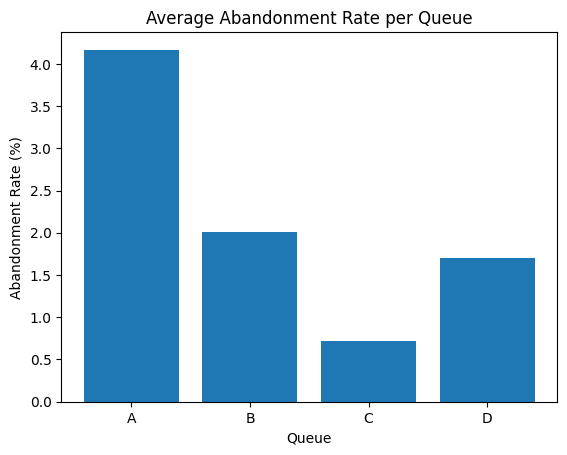

In [67]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
queue_data = df.groupby('Queue')[['Abandoned', 'Calls']].sum()

abandonment_rate = (queue_data['Abandoned'] / queue_data['Calls']) * 100 # Calculates abandonment rate

# Generate a bar chart of Abandonment Rate (%) grouped by Queue
plt.figure()
plt.bar(abandonment_rate.index, abandonment_rate.values)
plt.title('Average Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate (%)')
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a bar chart because it is a strong chart for visualizing distinct categories against the same values, and clearly visually indicates differences in abandonment rate percentages between queues A, B, C, and D. The heights of each bar makes it immediately apparent to the audience which which queues are more and less successful.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

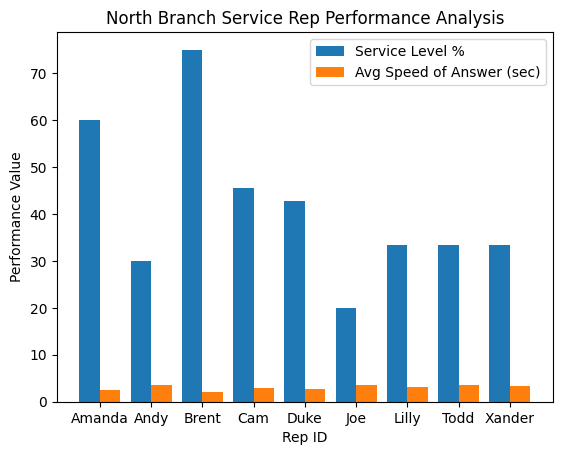

In [68]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
import numpy as np

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

rep_data_combined = pd.merge(service_level, north_plt, on='Rep ID')

x = np.arange(len(rep_data_combined))
width = 0.4
plt.figure()
plt.bar(x - width/2, rep_data_combined['Service Level %'],
        width, label='Service Level %') # Creates the bar for Service level
plt.bar(x + width/2, rep_data_combined['Incoming Wait Time'],
        width, label='Avg Speed of Answer (sec)') # Creates the bar for average speed of answer

plt.xticks(x, rep_data_combined['Rep ID'])
plt.xlabel('Rep ID')
plt.ylabel('Performance Value')
plt.title('North Branch Service Rep Performance Analysis')
plt.legend()

plt.show()

##### Record your answer below:

> Chart style you chose and why: I used a grouped bar chart for this case. Much like Visualization 1, we are comparing multiple groups, in this case Representatives instead of queues, and in this case we are comparing two different metrics (Service Level % and Avg Speed of Answer). A grouped bar chart clearly shows the two metrics side by side for each representative, and also quickly and easily allows the audience to compare performance between the different representatives. It is the best chart for this type of data visualization.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


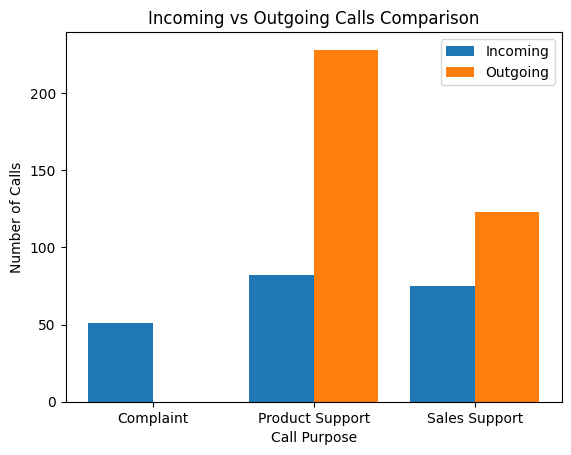

In [69]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

call_purpose = ['Complaint','Product Support', 'Sales Support']
incoming_calls = [complaints.get('Incoming', 0),
            product_support.get('Incoming', 0),
            sales_support.get('Incoming', 0)] # Incoming call amounts
outgoing_calls = [complaints.get('Outgoing', 0),
            product_support.get('Outgoing', 0),
            sales_support.get('Outgoing', 0)] # Outgoing call amounts

x = range(len(call_purpose))

plt.figure()

plt.bar([i - width/2 for i in x], incoming_calls, width, label='Incoming')
plt.bar([i + width/2 for i in x], outgoing_calls, width, label='Outgoing')

plt.xticks(x, call_purpose)
plt.xlabel('Call Purpose')
plt.ylabel('Number of Calls')
plt.title('Incoming vs Outgoing Calls Comparison')
plt.legend()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I once again chose a grouped bar chart, for the same reasons as in Visualization 2. W are comparing two categories (incoming and outgoing) and across multiple call purposes (complaint, product support, sales support). Grouped bar charts are able to quickly and cleanly show the differences in number of calls both between incoming and outgoing, and across three different call purposes.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
Let's restate the data here. 
The North branch service level is 40.24%.
The South branch service level is 38.1%. 
This is relatively close, but the North branch is answering calls within the desired service level KPI 2% more than the South branch. Edge to the North branch. 

The average speed of answer for the North branch is 3.05 seconds.
The average speed of answer for the South branch is 3.0 seconds.
This is a negligible difference.

The North branch call abandonment rate is 2.86%. 
The South branch call abandonment rate is 1.27%. 
This is a significant difference and the biggest differentiator, as it means the North branch is having callers hang up during their wait more than twice as often as the South branch. 

The results are very close, and seem to indicate that the North branch is answering a higher percentage of their calls on time, but are likely having more Not Ready Minutes than the South branch, which would explain the higher abandonment rate. Therefore, I would argue that while the representatives at the North branch are more efficient, there are either not quite enough representatives at this branch to handle the call volume, or perhaps the representatives are just unavailable to take calls a higher % of the time compared to the South branch. The North branch would benefit from additional staff.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
As stated above, I believe the North branch could use additional staff. The North branch currently has 9 representatives, leaving it a bit short-staffed compared to the South branch at 11 representatives. We also know that the North branch is experiencing a customer call abandonment rate over 2x higher than the South branch, which tells us the wait times for customers calling in to the North branch are too long. The best course of action would be to add 1-2 more representatives at the North branch location.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
It would be nice to also have time-series data so we could see how each branch's performance is trending over time. Since the performance metrics for both branches are relatively close, analyzing trends over time would probably be a stronger indicator of future success for both of these branches than the current comparison of the two. Short of this, it would have been great to have data from a third branch, to help identify whether any of the metrics can be improved upon, or whether the South or North branch is operating particularly well in any specific metric.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 
I chose a line chart for this purpose because I wanted to keep the call purposes distinct, but I also wanted to see how the data trends over the course of the day, from hour to hour, and this seemed like the cleanest way to represent it. It makes it very clear to the audience the ways in which call volume trend throughout the day.

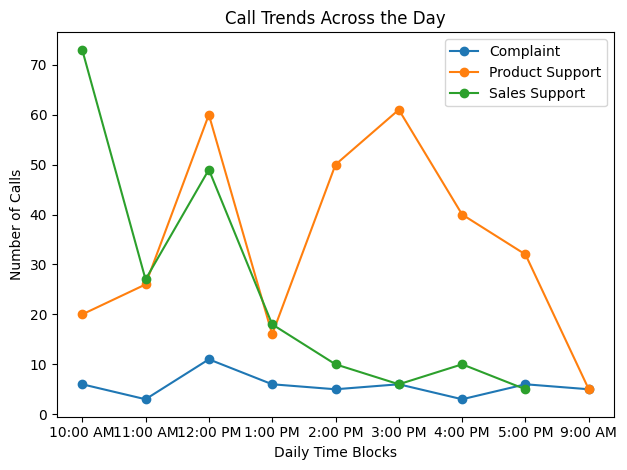

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[['Time Block', 'Call Purpose', 'Incoming or Outgoing', 'Calls']]

# Use groupby to plot based on time blocks:
time_blocks = call_times.groupby('Call Purpose')

# Use groupby and get_group to select which call purpose to plot:
complaint = time_blocks.get_group('Complaint')
product_support = time_blocks.get_group('Product Support')
sales_support = time_blocks.get_group('Sales Support')

# Put the groupings in chronological order for the day 
chrono_order = ['9:00 AM', '10:00 AM', '11:00 AM', '12:00 PM',
                 '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM']

complaint_counts = complaint.groupby('Time Block')['Calls'].sum().reindex(chrono_order)
product_counts = product_support.groupby('Time Block')['Calls'].sum().reindex(chrono_order)
sales_counts = sales_support.groupby('Time Block')['Calls'].sum().reindex(chrono_order)

plt.plot(complaint_counts.index, complaint_counts.values,
         marker='o', label='Complaint')
plt.plot(product_counts.index, product_counts.values,
         marker='o', label='Product Support')
plt.plot(sales_counts.index, sales_counts.values,
         marker='o', label='Sales Support')


plt.xlabel('Daily Time Blocks')
plt.ylabel('Number of Calls')
plt.title('Call Trends Across the Day')
plt.legend()
plt.tight_layout()
plt.show()